In [34]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [36]:
import numpy as np
import pandas as pd

In [38]:
coffee_production = pd.read_csv('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/coffee/total-production.csv').T
coffee_production.columns = coffee_production.iloc[0]
coffee_production = coffee_production.drop("total_production")

coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [40]:
brazil_vs_others = (coffee_production
                    .assign(rest_of_world = coffee_production
                            .drop("Brazil", axis=1).sum(axis=1))
                    .loc[:, ["Brazil", "rest_of_world"]]
                    .astype({"Brazil": "float64"})
                   )


brazil_vs_others.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [42]:
coffee_production["Rest of World"] = coffee_production.drop(["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             # "World ex-Brazil"
                                                              ], axis=1).sum(axis=1)

coffee_production_top5_2018 = coffee_production.loc['2018', ["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             "Rest of World"
                                                            ]
                                                   ]

pd.DataFrame(coffee_production_top5_2018)

,2018
total_production,
Brazil,62924.8836
Viet Nam,31174.0742
Colombia,13857.962
Indonesia,9417.5942
Ethiopia,7776.2234
Rest of World,45786.0003


In [74]:
plt.rc("axes.spines",top=False,right=False)

In [274]:
brazil_vs_others["rest_of_world"] = pd.to_numeric(brazil_vs_others["rest_of_world"], errors='coerce')

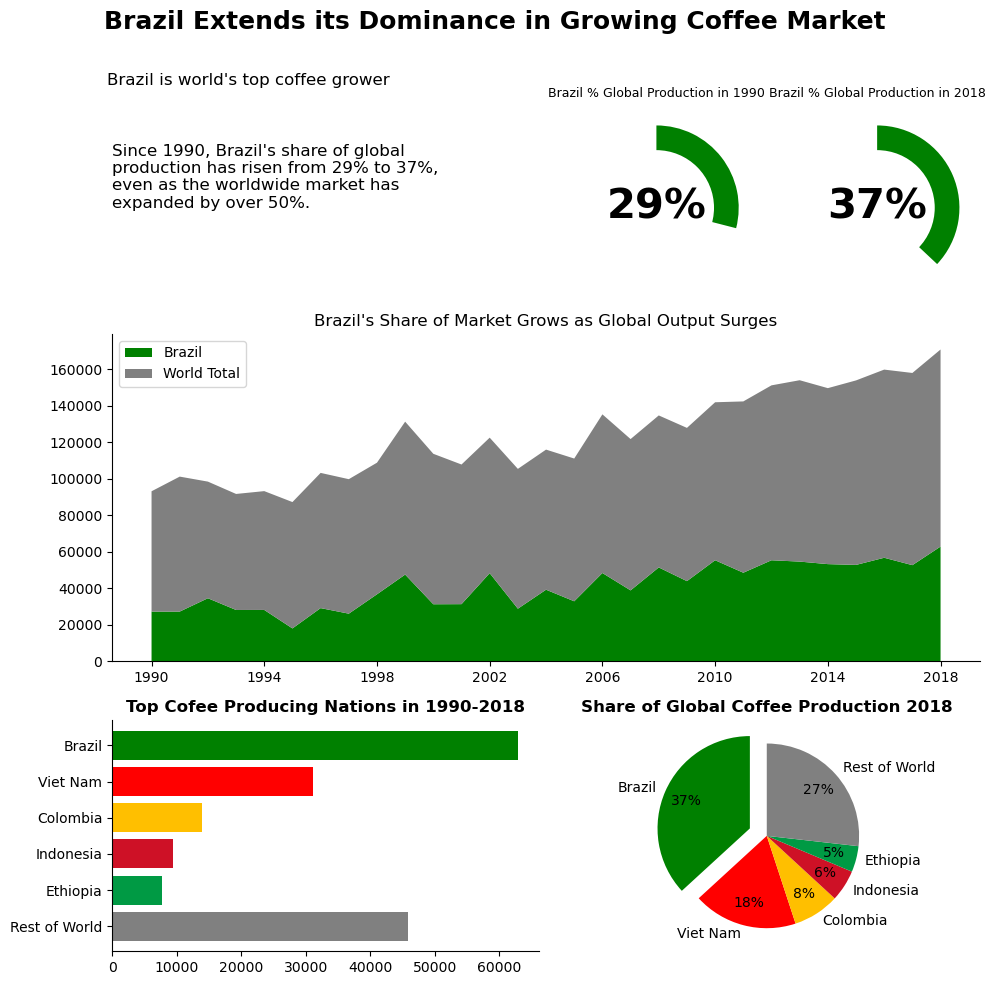

In [404]:
fig = plt.figure(figsize=(10,10),constrained_layout=False)
gs=gridspec.GridSpec(nrows=10,ncols=4)

fig.suptitle("Brazil Extends its Dominance in Growing Coffee Market",fontsize=18,fontweight="bold")

ax0=fig.add_subplot(gs[0:4,0:2])
ax0.text(0,0.5,"Since 1990, Brazil's share of global \nproduction has risen from 29% to 37%,\neven as the worldwide market has\nexpanded by over 50%.",fontsize=12)
ax0.spines[["bottom","left"]].set_visible(False)
ax0.set_title("Brazil is world's top coffee grower",x=.32,y=0.85)

ax0.tick_params(bottom=False)
ax0.tick_params(labelbottom=False)

ax0.tick_params(left=False)
ax0.tick_params(labelleft=False)


ax1=fig.add_subplot(gs[0:4,2:3])
ax1.pie(
    x=[0.71,0.29],
    startangle=90,
    #autopct="%.0f%%",
    pctdistance=0.8,
    colors=["white","green"]
)

donut_hole= plt.Circle((0,0),0.7,facecolor="white")
ax1.add_artist(donut_hole)
ax1.text(0,0,"29%",ha="center",va="center",fontweight="bold",fontsize=30)
ax1.set_title("Brazil % Global Production in 1990",fontsize=9)


ax2=fig.add_subplot(gs[0:4,3:])
ax2.pie(
    x=[0.63,0.37],
    startangle=90,
    #autopct="%.0f%%",
    pctdistance=0.8,
    colors=["white","green"]
)

donut_hole= plt.Circle((0,0),0.7,facecolor="white")
ax2.add_artist(donut_hole)
ax2.text(0,0,"37%",ha="center",va="center",fontweight="bold",fontsize=30)
ax2.set_title("Brazil % Global Production in 2018",fontsize=9)


ax3=fig.add_subplot(gs[3:7,:])
ax3.stackplot(
    brazil_vs_others.index,
    brazil_vs_others["Brazil"],
    brazil_vs_others["rest_of_world"],
    colors=["green","grey"],
    labels=["Brazil","World Total"]
)

ax3.legend()
ax3.set_xticks(brazil_vs_others.index[::4])
ax3.set_title("Brazil's Share of Market Grows as Global Output Surges")


ax4=fig.add_subplot(gs[7:,0:2])
ax4.barh(
    coffee_production_top5_2018.index[::-1],
    coffee_production_top5_2018[::-1],
    color=["green","red","#FFBF00","#CE1126","#009A44","grey"][::-1]
)
ax4.set_title("Top Cofee Producing Nations in 1990-2018",fontweight = 800)

ax5=fig.add_subplot(gs[7:,2:])
ax5.pie(
    x=coffee_production_top5_2018,
    autopct="%.0f%%",
    pctdistance=0.75,
    startangle=90,
    labels=coffee_production_top5_2018.index,
    colors=["green","red","#FFBF00","#CE1126","#009A44","grey"],
    explode=(0.2,0,0,0,0,0)
)

ax5.set_title("Share of Global Coffee Production 2018",fontweight = 800)

plt.savefig("Project 02",bbox_inches='tight')

plt.tight_layout()